In [1]:
import pandas as pd 

df = pd.read_excel("Flight Dataset.xlsx")

### Preprocessing

**Explored Unique Values**:
Checked the unique values in the "Aircraft Type" column and dropped it from the dataset as the dataset only includes one aircraft type.

**Dropped Missing Airport Data**:
Removed rows where either the "Departure Airport" or "Arrival Airport" had missing values.

**Ensured Correct Time Format**:
Cleaned up the "Departure Time" and "Arrival Time" columns to make sure they follow the "HH:MM" format. Any non-standard or missing times were handled appropriately.

**Created New Features**:

- Fuel Consumption: Calculated the fuel consumed during the flight by subtracting the "Fuel at Arrival" from the "Fuel at Departure."

- Flight Duration: Calculated the flight duration by subtracting the "Departure Time" from the "Arrival Time," then converting it into hours.

- Encoded Airport Pairs (Destinations): Assigned each unique airport pair a numerical ID by converting the "airport_pair" column into categorical codes.

**Dropped Unnecessary Columns**:
Removed the "airport_pair" column, as well as the "Fl. Nb" and "No" columns, which were not necessary for further analysis.

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   No                 59 non-null     int64         
 1   Fl. Nb             59 non-null     int64         
 2   Departure Airport  58 non-null     object        
 3   Arrival Airport    57 non-null     object        
 4   Date               59 non-null     datetime64[ns]
 5   Fuel at Departure  59 non-null     int64         
 6   Fuel at Arrival    59 non-null     int64         
 7   Departure Time     59 non-null     object        
 8   Arrival Time       59 non-null     object        
 9   Aircraft Type      59 non-null     object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 4.7+ KB


In [225]:
df

,No,Fl. Nb,Departure Airport,Arrival Airport,Date,Fuel at Departure,Fuel at Arrival,Departure Time,Arrival Time,Aircraft Type
0,1,3805,LEJ,TFS,2025-01-01,17537,7257,10:04,14:04,A320
1,2,3953,LEJ,HRG,2025-01-03,10396,2686,18:35,21:35:00,A320
2,3,2992,LEJ,FUE,2025-01-04,17137,9427,16:32,19:32:00,A320
3,4,454,LEJ,LPA,2025-01-05,13690,5980,17:59,20:59:00,A320
4,5,3928,LEJ,TFS,2025-01-08,16045,6335,09:32,13:30:00,A320
5,6,3125,LEJ,HRG,2025-01-10,16357,8647,19:05,22:05,A320
6,7,3751,LEJ,FUE,2025-01-11,16571,8861,12:30,15:30,A320
7,8,1449,LEJ,LPA,2025-01-12,14774,7064,12:16,15:16,A320
8,9,2177,LEJ,TFS,2025-01-15,14613,6903,12:47,16:40:00,A320
9,10,3795,LEJ,FUE,2025-01-18,13341,5631,09:43,12:43:00,A320


In [226]:
# Checking some columns to gain insights about the variables
print("Aircraft Type:", df["Aircraft Type"].unique())
df.drop(columns=["Aircraft Type"], inplace = True)

Aircraft Type: ['A320']


In [227]:
# Fixing "NaN" as a string in airport names
df["Departure Airport"] = df["Departure Airport"].replace("NaN", pd.NA)
df["Arrival Airport"] = df["Arrival Airport"].replace("NaN", pd.NA)

# Dropping NaN values in airports
df = df.dropna(subset=["Departure Airport", "Arrival Airport"])  

In [228]:
# Checking some columns to gain insights about the variables
print("Departure Airport:", df["Departure Airport"].unique())
print("Arrival Airport:", df["Arrival Airport"].unique())

Departure Airport: ['LEJ' 'AYT' 'IST']
Arrival Airport: ['TFS' 'HRG' 'FUE' 'LPA' 'HAM' 'HAJ' 'DUS' 'SAW' 'FRA' 'DTM' 'BER' 'SOF'
 'AYT' 'AMS' 'MUC' 'ECN']


In [229]:
# Ensuring time columns are in proper HH:MM format
def clean_time_format(time_str):
    if pd.isna(time_str):
        return None
    return time_str[:5]  # Keep only first 5 characters (HH:MM)

df["Departure Time"] = df["Departure Time"].astype(str).apply(clean_time_format)
df["Arrival Time"] = df["Arrival Time"].astype(str).apply(clean_time_format)

# Adding new features based on existing ones: fuel consumption and flight duration
df["fuel_consumption"] = df["Fuel at Departure"] - df["Fuel at Arrival"]
df["flight_duration"] = (
    pd.to_datetime(df["Arrival Time"], format="%H:%M") - pd.to_datetime(df["Departure Time"], format="%H:%M")
).dt.total_seconds() / 3600  

/var/folders/x3/pkxr6fs91b9dt9nf608j0q100000gn/T/ipykernel_7387/3902554002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Departure Time"] = df["Departure Time"].astype(str).apply(clean_time_format)
/var/folders/x3/pkxr6fs91b9dt9nf608j0q100000gn/T/ipykernel_7387/3902554002.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Arrival Time"] = df["Arrival Time"].astype(str).apply(clean_time_format)
/var/folders/x3/pkxr6fs91b9dt9nf608j0q100000gn/T/ipykernel_7387/3902554002.py:11: SettingWithCopyWar

In [230]:
# Creating an airport pair column
df["airport_pair"] = df["Departure Airport"] + "_" + df["Arrival Airport"]

# Encoding unique pairs with a numerical ID
df["destination_id"] = df["airport_pair"].astype("category").cat.codes

# Rounded flight durations
df['flight_duration'] = df['flight_duration'].round(2)

/var/folders/x3/pkxr6fs91b9dt9nf608j0q100000gn/T/ipykernel_7387/3226170565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["airport_pair"] = df["Departure Airport"] + "_" + df["Arrival Airport"]
/var/folders/x3/pkxr6fs91b9dt9nf608j0q100000gn/T/ipykernel_7387/3226170565.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["destination_id"] = df["airport_pair"].astype("category").cat.codes
/var/folders/x3/pkxr6fs91b9dt9nf608j0q100000gn/T/ipykernel_7387/3226170565.py:8: SettingWithCopyWarning: 
A valu

In [231]:
# The list showing which destination belongs to which airport pairs
destination_pairs = df.groupby("destination_id")["airport_pair"].unique()

# Display the destination pairs
for destination_id, airport_pairs in destination_pairs.items():
    print(f"Destination {destination_id}: {airport_pairs}")

Destination 0: ['AYT_AMS']
Destination 1: ['AYT_BER']
Destination 2: ['AYT_DTM']
Destination 3: ['AYT_DUS']
Destination 4: ['AYT_FRA']
Destination 5: ['AYT_HAJ']
Destination 6: ['AYT_HAM']
Destination 7: ['AYT_MUC']
Destination 8: ['AYT_SAW']
Destination 9: ['AYT_SOF']
Destination 10: ['IST_AYT']
Destination 11: ['IST_ECN']
Destination 12: ['LEJ_FUE']
Destination 13: ['LEJ_HRG']
Destination 14: ['LEJ_LPA']
Destination 15: ['LEJ_TFS']


In [232]:
# Drop the original airport pair column
df.drop(columns=["airport_pair"], inplace=True)
df.drop(columns=["Fl. Nb", "No"], inplace = True)

/var/folders/x3/pkxr6fs91b9dt9nf608j0q100000gn/T/ipykernel_7387/3249141395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["airport_pair"], inplace=True)
/var/folders/x3/pkxr6fs91b9dt9nf608j0q100000gn/T/ipykernel_7387/3249141395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Fl. Nb", "No"], inplace = True)


### Exploratory Data Analysis

#### Key Features Affecting Fuel Consumption

- **Flight Durations**: Longer flights generally consume more fuel due to extended engine use and increased distance traveled.
- **Weights of the Airplanes**: Heavier aircraft require more fuel to lift and maintain flight, leading to higher fuel consumption.
- **Weather Conditions**: Weather factors such as wind speed, temperature, and precipitation can influence fuel efficiency. 
- **Flight Distances**: Longer flight distances require more fuel as more energy is needed to cover the distance.

#### Statistical Insights

The dataset consists of the flights in January, 2025, and includes 56 flights. The average fuel at departure is around 16,890 liters, while the fuel at arrival averages 8,397 liters, with significant variability in both. Fuel consumption ranges from 2,570 to 13,280 liters, with an average of 8,493 liters, indicating important differences in fuel usage across flights. The flight durations range from 1 to 4.17 hours, with the median at 3 hours and a mean of 3.33 hours. This consistency suggests that most of the flights in the dataset are of a similar length, but there are still some flights that are significantly longer or shorter, which might indicate diverse flight routes or operational patterns. Overall, these statistics show important variations in fuel consumption and flight duration, highlighting factors such as route differences, weather conditions, and aircraft total weights that could affect fuel efficiency.

#### Interpretation of the Graphs

Fuel at Departure vs. Fuel Consumption graph reveals that the fuel consumption exceeds 12,000 liters only when the fuel at departure is greater than 24,000 liters. Special cases (destination numbers 3, 8, 9, 7 and index numbers 49, 50, 29, 55) show different fuel consumption due to variations in fuel at departure, even when the destination and flight duration are the same.

Special Cases that Illustrates the Inefficiency of Excessive Amount of "Fuel at Departure": Special destionations are AYT-SOF, AYT-DUS, AYT-SAW, AYT-MUC and the flight numbers are, resepectively, 2871, 125, 641 and 3272.

Fuel Consumption vs. Flight Duration graph suggests that a mostly linear relationship is observed between these two factors. However, there is a special case that disrupts the linearity, which is linked to excessive fuel at departure, as previously investigated.

Fuel Consumption vs. Date graph suggests that fuel consumption is generally smaller towards the end of the month. Outlier cases at 17th of Jan is linked to excessive fuel at departure, as previously investigated.

Destinations vs. Fuel Consumption graph suggests that destinations numbered 7, 9, 11, 1, and 2 show higher fuel consumption compared to others. However, further investigation suggests that this is likely due to the flight durations.

Laslty, distribution insights reveals that more flights occur between the 1st and 5th of January. Additionally, weekends have more flights than weekdays.

#### Additional Preprocessing Steps

- **Adding and Dropping New Columns**: A new column weekday is added to further investigate the relationship between weekdays and fuel consumption. A new column monthday is created in order to convert the date format to numeric format. Two new columns, departure_minutes and arrival_minutes, are created by converting the time to minutes (numbers). Flight_duration_minutes is calculated as the difference in minutes between arrival_minutes and departure_minutes. It provides consistency between departure minutes/arrival minutes and flight durations.
As a result, the columns Departure Airport, Arrival Airport, Departure Time, Arrival Time, and Date are removed as they are no longer needed after the transformations.


#### Correlation  Analysis 
The correlation anaylsis reveals that there is high correlation between two pairs of columns: flight_duration and flight_duration_minutes, departure_minutes and arrival_minutes. To prevent multicollinearity, one of them was dropped.    


In [233]:
df.describe()

,Date,Fuel at Departure,Fuel at Arrival,fuel_consumption,flight_duration,destination_id
count,56,56.000000,56.000000,56.000000,56.000000,56.000000
mean,2025-01-09 18:00:00,16889.875000,8397.017857,8492.857143,3.330179,7.928571
min,2025-01-01 00:00:00,10396.000000,2686.000000,2570.000000,1.000000,0.000000
25%,2025-01-03 00:00:00,14262.750000,5950.000000,7710.000000,3.000000,4.000000
50%,2025-01-05 00:00:00,16464.000000,7411.000000,7710.000000,3.460000,8.000000
75%,2025-01-17 06:00:00,18197.500000,10208.500000,10280.000000,4.000000,11.250000
max,2025-01-31 00:00:00,27567.000000,17960.000000,13280.000000,4.170000,15.000000
std,NaN,3425.761813,3529.808913,2148.175305,0.767761,4.487790


In [234]:
df

,Departure Airport,Arrival Airport,Date,Fuel at Departure,Fuel at Arrival,Departure Time,Arrival Time,fuel_consumption,flight_duration,destination_id
0,LEJ,TFS,2025-01-01,17537,7257,10:04,14:04,10280,4.00,15
1,LEJ,HRG,2025-01-03,10396,2686,18:35,21:35,7710,3.00,13
2,LEJ,FUE,2025-01-04,17137,9427,16:32,19:32,7710,3.00,12
3,LEJ,LPA,2025-01-05,13690,5980,17:59,20:59,7710,3.00,14
4,LEJ,TFS,2025-01-08,16045,6335,09:32,13:30,9710,3.97,15
5,LEJ,HRG,2025-01-10,16357,8647,19:05,22:05,7710,3.00,13
6,LEJ,FUE,2025-01-11,16571,8861,12:30,15:30,7710,3.00,12
7,LEJ,LPA,2025-01-12,14774,7064,12:16,15:16,7710,3.00,14
8,LEJ,TFS,2025-01-15,14613,6903,12:47,16:40,7710,3.88,15
9,LEJ,FUE,2025-01-18,13341,5631,09:43,12:43,7710,3.00,12


/var/folders/x3/pkxr6fs91b9dt9nf608j0q100000gn/T/ipykernel_7387/1876469024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['Date'])


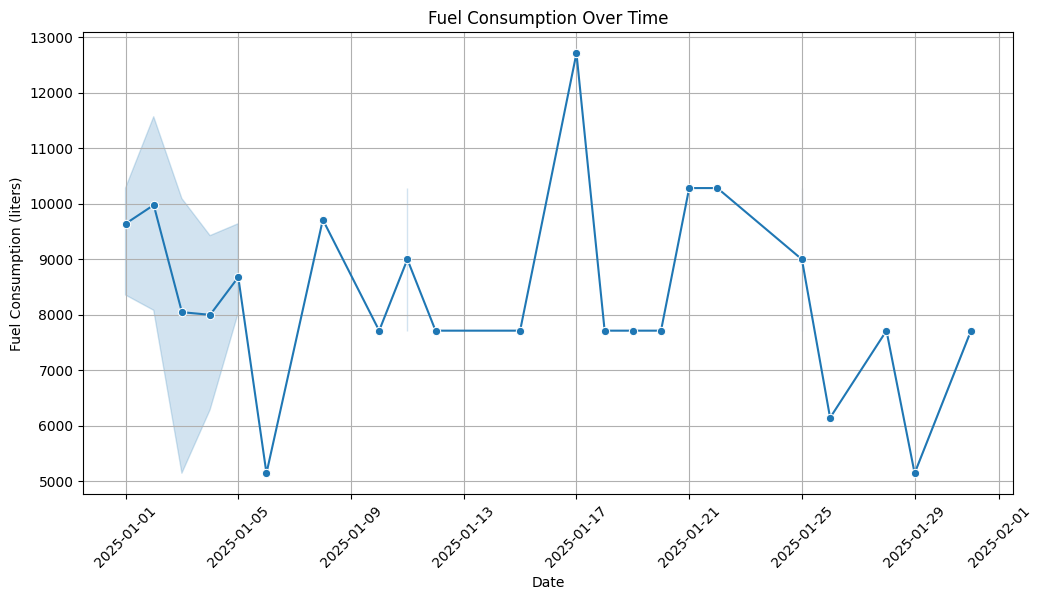

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by date to ensure proper ordering
df = df.sort_values('date')

# Plot fuel consumption over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='fuel_consumption', data=df, marker='o')
plt.title('Fuel Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Fuel Consumption (liters)')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

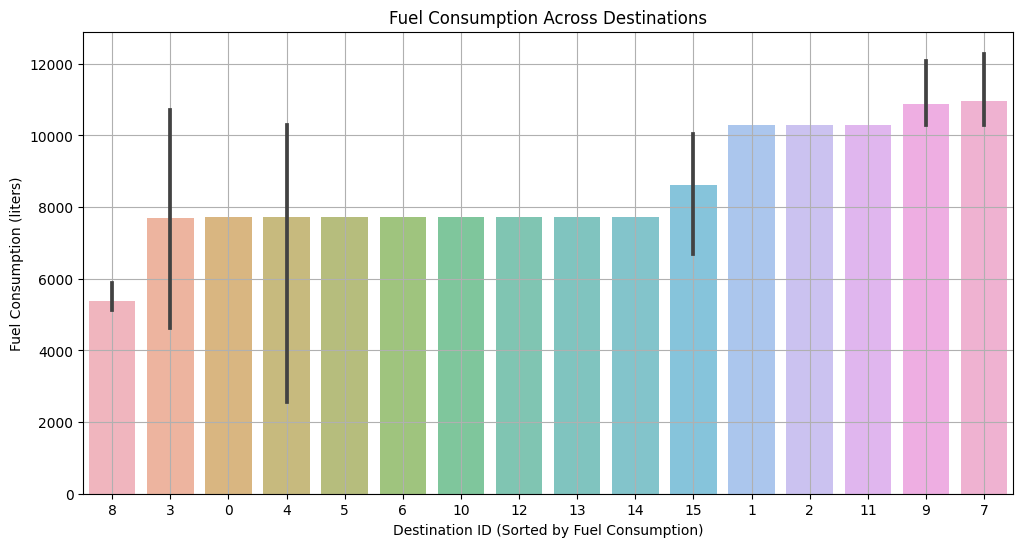

In [236]:
plt.figure(figsize=(12, 6))

# Calculate the mean fuel consumption per destination and sort it
sorted_dest = df.groupby('destination_id')['fuel_consumption'].mean().sort_values().index

plt.figure(figsize=(12, 6))

sns.barplot(x=pd.Categorical(df['destination_id'], categories=sorted_dest, ordered=True),
            y=df['fuel_consumption'], alpha=0.7)
plt.xlabel('Destination ID (Sorted by Fuel Consumption)')
plt.ylabel('Fuel Consumption (liters)')
plt.title('Fuel Consumption Across Destinations')
plt.grid(True)
plt.show()

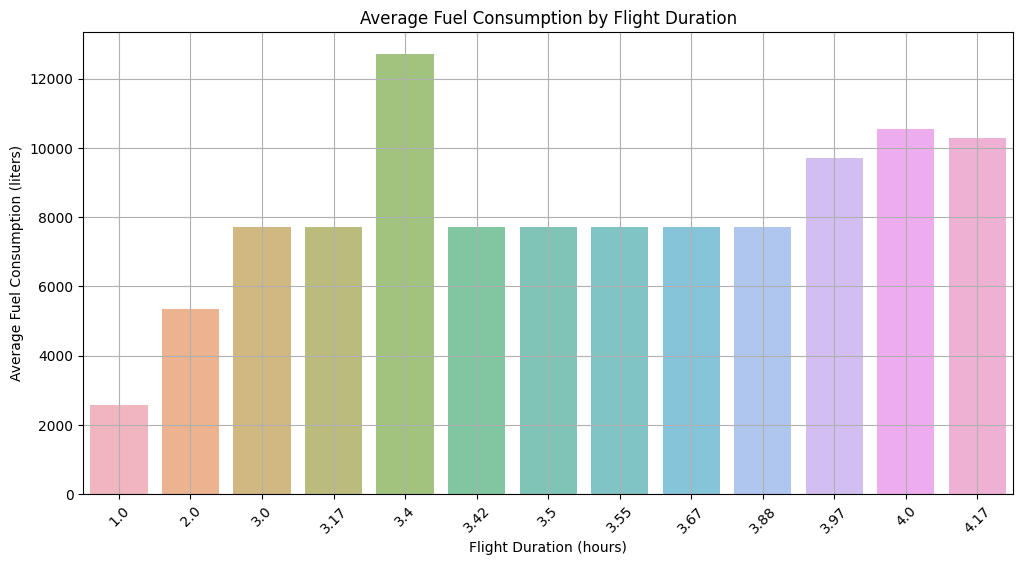

In [237]:
plt.figure(figsize=(12, 6))

# Group by flight duration and calculate the mean fuel consumption
avg_fuel_per_duration = df.groupby('flight_duration')['fuel_consumption'].mean().reset_index()

# Plot the bar chart
sns.barplot(x='flight_duration', y='fuel_consumption', data=avg_fuel_per_duration, alpha=0.7)

plt.xlabel('Flight Duration (hours)')
plt.ylabel('Average Fuel Consumption (liters)')
plt.title('Average Fuel Consumption by Flight Duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


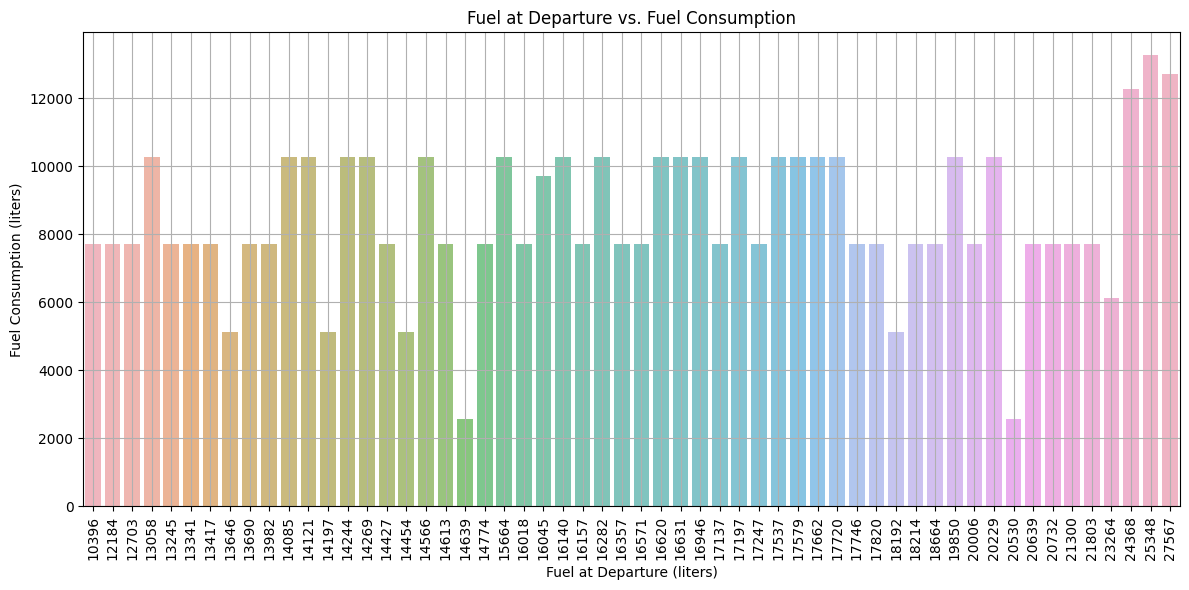

In [238]:
plt.figure(figsize=(12, 6))

# Plot the bar chart with 'Fuel at Departure' on the x-axis and 'fuel_consumption' on the y-axis
sns.barplot(x='Fuel at Departure', y='fuel_consumption', data=df, alpha=0.7)

# Labels and title
plt.xlabel('Fuel at Departure (liters)')
plt.ylabel('Fuel Consumption (liters)')
plt.title('Fuel at Departure vs. Fuel Consumption')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  

# Enable grid for better visualization
plt.grid(True)

plt.tight_layout() 
plt.show()


In [256]:
# Let us check destination 3, 8, 9, 7 (AYT-DUS, AYT-SAW, AYT-SOF and AYT-MUC) index number 49, 50, 29, 55
df_sorted_fuel_at_departure = df.sort_values(by='destination_id', ascending=False)
df_sorted_fuel_at_departure

,Fuel at Departure,Fuel at Arrival,fuel_consumption,destination_id,weekday,monthday,arrival_minutes,flight_duration_minutes
0,17537,7257,10280,15,2,1,844,240
22,14454,9314,5140,15,2,29,1245,120
4,16045,6335,9710,15,2,8,810,238
8,14613,6903,7710,15,2,15,1000,233
11,16946,6666,10280,15,2,22,1133,250
3,13690,5980,7710,14,6,5,1259,180
7,14774,7064,7710,14,6,12,916,180
10,12184,4474,7710,14,6,19,1156,180
5,16357,8647,7710,13,4,10,1325,180
1,10396,2686,7710,13,4,3,1295,180


#### Correlation Anaylsis

In [240]:
# Converting all variables into numeric ones
df['weekday'] = df['Date'].dt.weekday  # Monday=0, Sunday=6
df['monthday'] = df['Date'].map(lambda x: x.day)
df['Departure Time'] = pd.to_datetime(df['Departure Time'], format='%H:%M')
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], format='%H:%M')
df['departure_minutes'] = df['Departure Time'].dt.hour * 60 + df['Departure Time'].dt.minute
df['arrival_minutes'] = df['Arrival Time'].dt.hour * 60 + df['Arrival Time'].dt.minute
df['flight_duration_minutes'] = df['arrival_minutes'] - df['departure_minutes']
df.drop(columns=["Departure Airport", "Arrival Airport", "Departure Time", "Arrival Time", "date", "Date"], inplace=True)
df

,Fuel at Departure,Fuel at Arrival,fuel_consumption,flight_duration,destination_id,weekday,monthday,departure_minutes,arrival_minutes,flight_duration_minutes
0,17537,7257,10280,4.00,15,2,1,604,844,240
42,16282,6002,10280,4.00,11,2,1,1026,1266,240
41,14085,3805,10280,4.00,11,2,1,487,727,240
34,20732,13022,7710,3.00,10,2,1,973,1153,180
52,13058,2778,10280,4.00,11,3,2,769,1009,240
51,20229,9949,10280,4.00,11,3,2,879,1119,240
36,16140,5860,10280,4.00,9,3,2,592,832,240
35,19850,9570,10280,4.00,9,3,2,810,1050,240
57,14197,9057,5140,2.00,8,3,2,596,716,120
23,17197,6917,10280,4.00,9,3,2,678,918,240


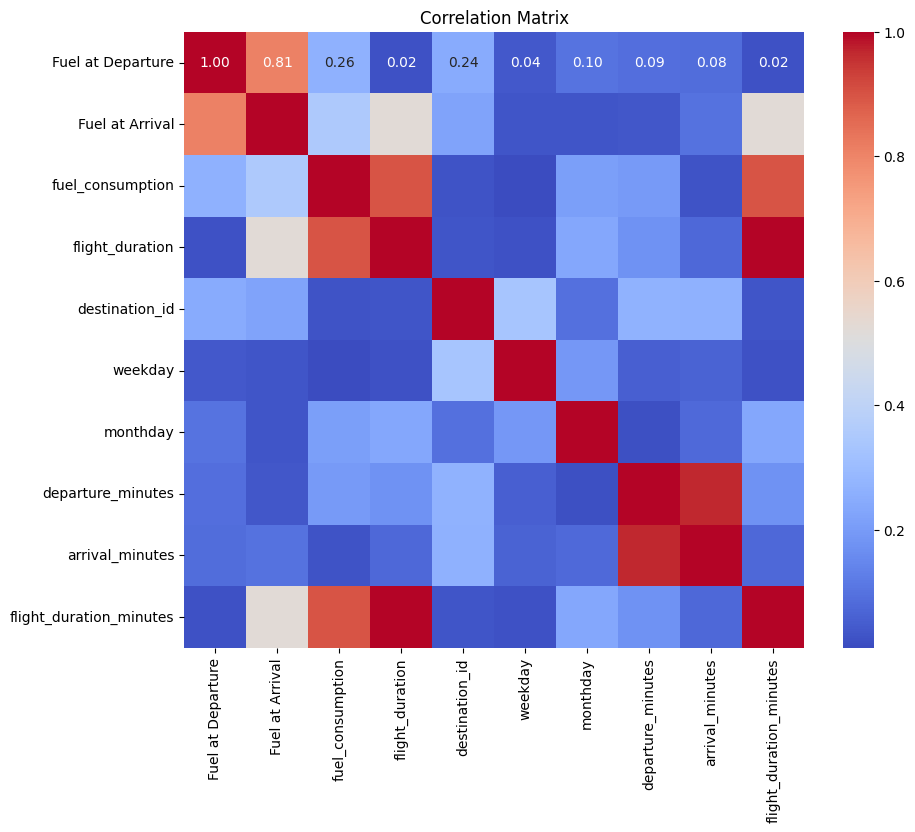

                   level_0                  level_1         0
0        Fuel at Departure          Fuel at Arrival  0.809638
1          Fuel at Arrival        Fuel at Departure  0.809638
2         fuel_consumption          flight_duration  0.896057
3         fuel_consumption  flight_duration_minutes  0.896270
4          flight_duration         fuel_consumption  0.896057
5          flight_duration  flight_duration_minutes  0.999999
6        departure_minutes          arrival_minutes  0.968846
7          arrival_minutes        departure_minutes  0.968846
8  flight_duration_minutes         fuel_consumption  0.896270
9  flight_duration_minutes          flight_duration  0.999999


In [241]:
# Calculating the correlation matrix
corr_df = df
correlation_matrix = corr_df.corr().abs()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

high_corr = correlation_matrix[(correlation_matrix.abs() > 0.8) & (correlation_matrix.abs()!= 1)]
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
print(high_corr.stack().reset_index())

In [242]:
# dropping one of the columns that shows multicollinearity
df.drop(columns=["departure_minutes", "flight_duration"], inplace=True)

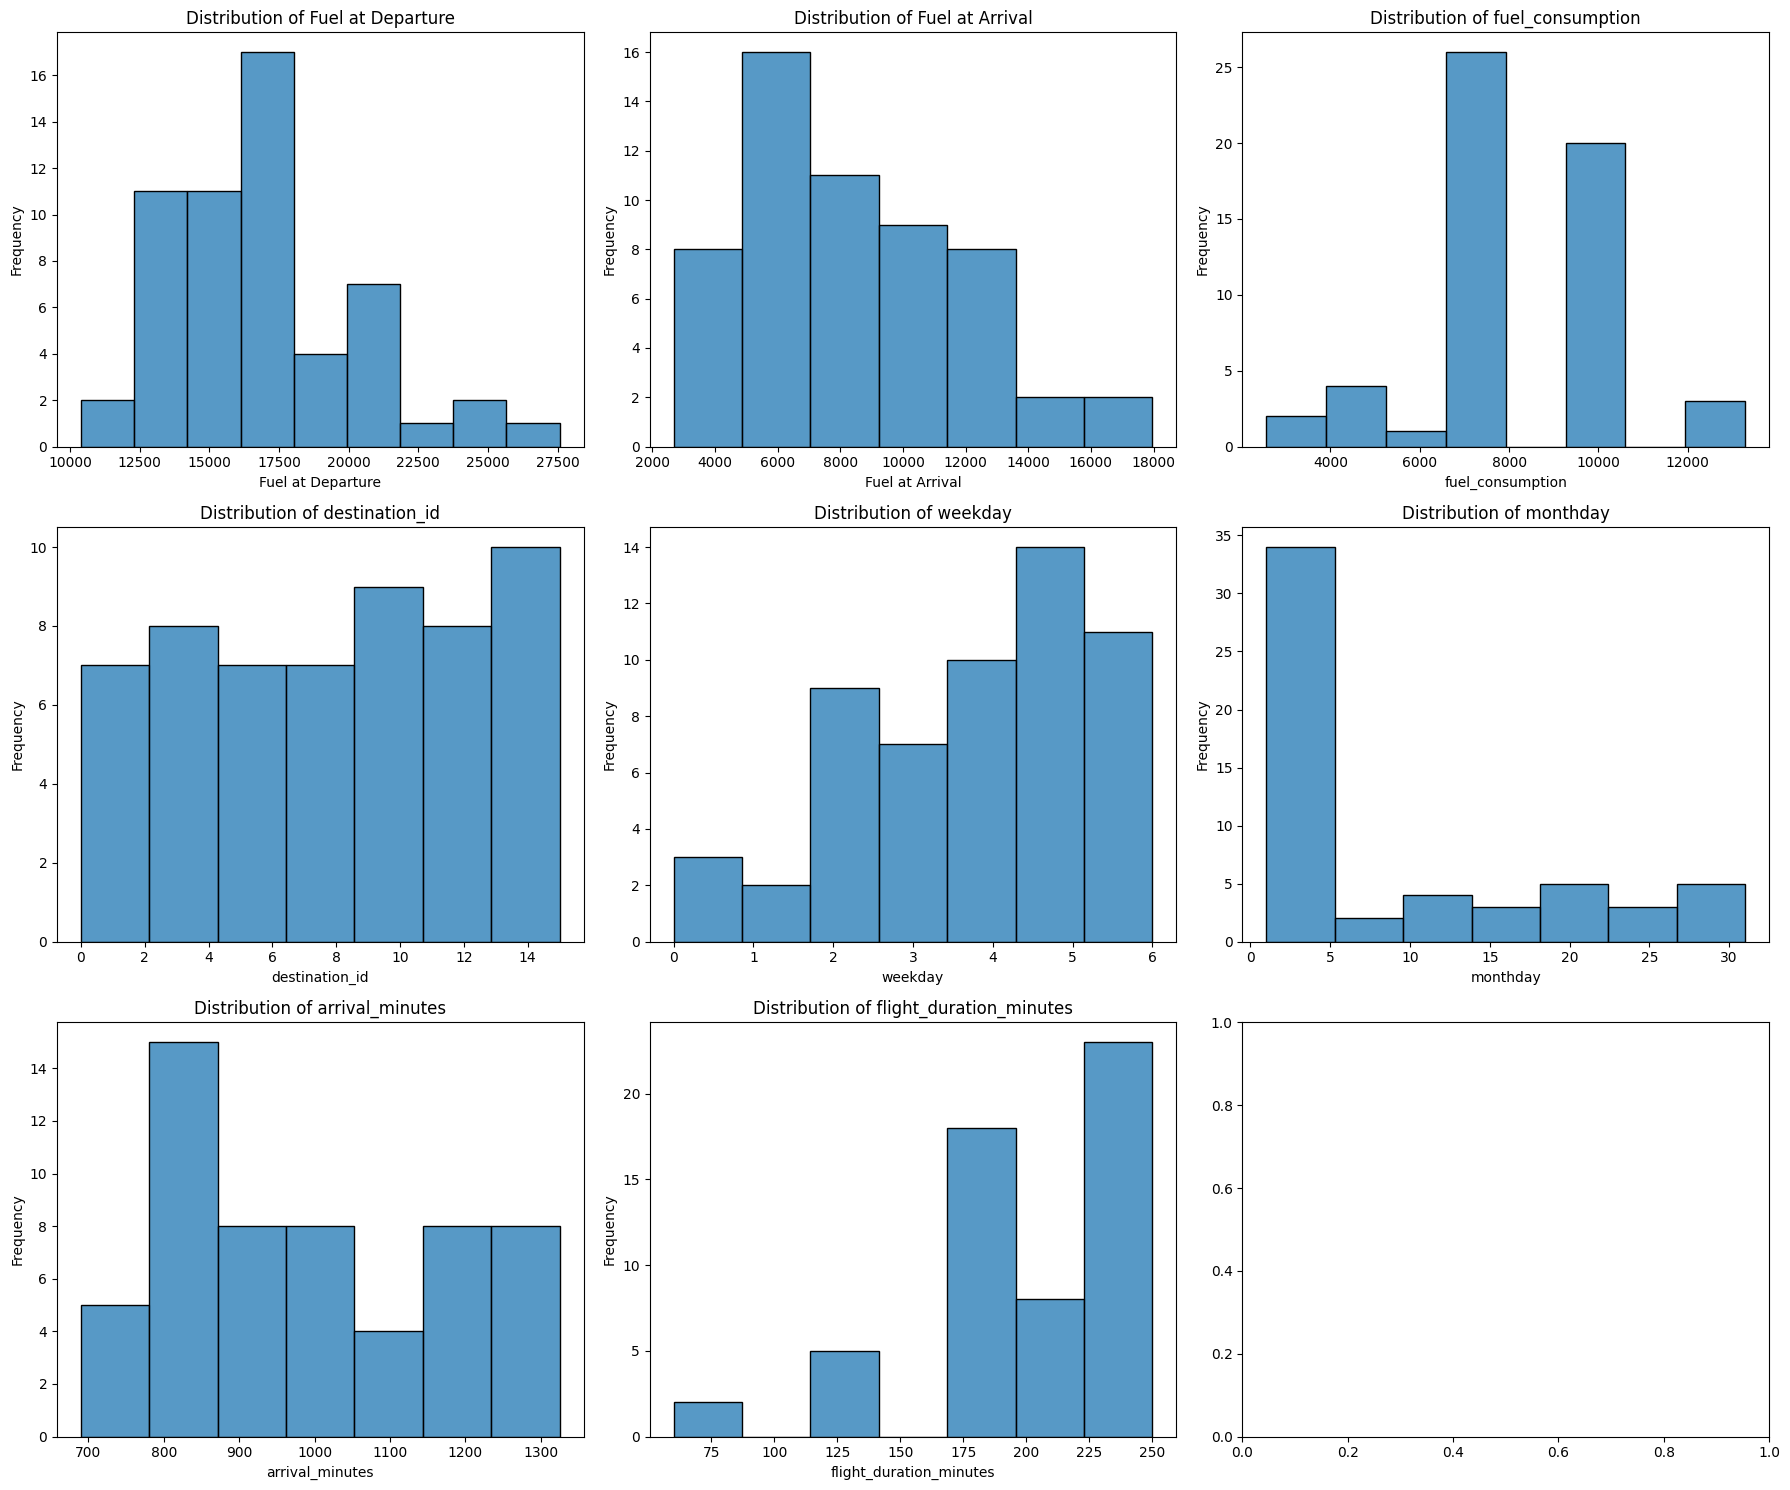

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of columns in the dataset
num_columns = len(df.columns)
num_rows = (num_columns + 2) // 3  

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))

# Loop through the columns to create the plots
for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.histplot(df[column], ax=axes[row, col], kde=False)  
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Predictive Modelling

In [244]:
fl = df.copy()
fl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Fuel at Departure        56 non-null     int64
 1   Fuel at Arrival          56 non-null     int64
 2   fuel_consumption         56 non-null     int64
 3   destination_id           56 non-null     int8 
 4   weekday                  56 non-null     int32
 5   monthday                 56 non-null     int64
 6   arrival_minutes          56 non-null     int32
 7   flight_duration_minutes  56 non-null     int32
dtypes: int32(3), int64(4), int8(1)
memory usage: 2.9 KB


In [245]:
# Chechking for NaN Values
nan_per_column = df.isna().sum()
print("Number of NaN values per column:")
print(nan_per_column)

Number of NaN values per column:
Fuel at Departure          0
Fuel at Arrival            0
fuel_consumption           0
destination_id             0
weekday                    0
monthday                   0
arrival_minutes            0
flight_duration_minutes    0
dtype: int64


In [246]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = fl.drop(columns=['fuel_consumption'])  # Drop the target variable
y = fl['fuel_consumption']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [247]:
# Initializing the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred = xgb_model.predict(X_test_scaled)

# Calculate errors
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)  
r2_xgb = r2_score(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape_xgb = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print results
print(f'MAE: {mae_xgb:.2f}')
print(f'MSE: {mse_xgb:.2f}')
print(f'RMSE: {rmse_xgb:.2f}')
print(f'R² Score: {r2_xgb:.2f}')
print(f'MAPE: {mape_xgb:.2f}%')


MAE: 161.70
MSE: 219061.59
RMSE: 468.04
R² Score: 0.96
MAPE: 1.65%


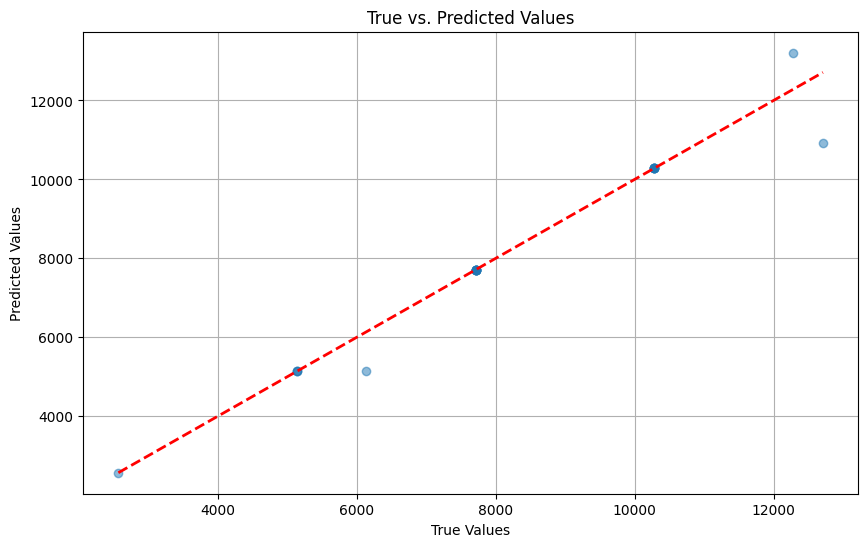

In [248]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=2, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.grid(True)
plt.show()


In [249]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=4242)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

# Evaluation Metrics
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape_rf = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAE: {mae_rf:.2f}')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'R² Score: {r2_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')


MAE: 526.55
MSE: 1493213.42
RMSE: 1221.97
R² Score: 0.74
MAPE: 8.41%


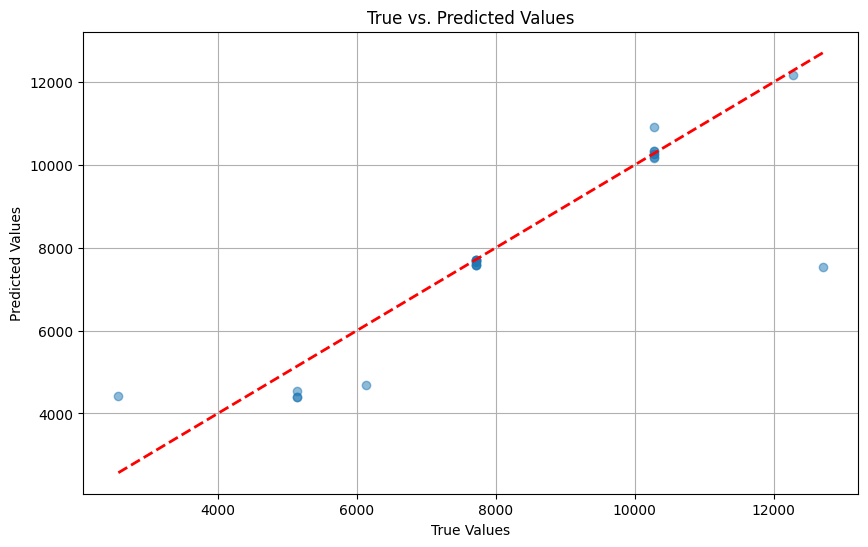

In [250]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=2, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.grid(True)
plt.show()


In [251]:
from catboost import CatBoostRegressor

# Initialize CatBoost Regressor model
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=2, random_state=42, verbose=100)

# Train the model
catboost_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = catboost_model.predict(X_test_scaled)

# Evaluation Metrics
mae_cb = mean_absolute_error(y_test, y_pred)
mse_cb = mean_squared_error(y_test, y_pred)
rmse_cb = np.sqrt(mse_cb)
r2_cb = r2_score(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape_cb = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAE: {mae_cb:.2f}')
print(f'MSE: {mse_cb:.2f}')
print(f'RMSE: {rmse_cb:.2f}')
print(f'R² Score: {r2_cb:.2f}')
print(f'MAPE: {mape_cb:.2f}%')


0:	learn: 1811.4743009	total: 1.56ms	remaining: 1.56s
100:	learn: 247.0930910	total: 12.1ms	remaining: 107ms
200:	learn: 75.7162624	total: 21.2ms	remaining: 84.3ms
300:	learn: 30.2322449	total: 29.3ms	remaining: 68.2ms
400:	learn: 15.0971648	total: 36.7ms	remaining: 54.8ms
500:	learn: 8.8787361	total: 42.3ms	remaining: 42.1ms
600:	learn: 5.5175301	total: 49.2ms	remaining: 32.6ms
700:	learn: 3.3746242	total: 55.5ms	remaining: 23.7ms
800:	learn: 2.1034916	total: 61.9ms	remaining: 15.4ms
900:	learn: 1.3427697	total: 66.1ms	remaining: 7.26ms
999:	learn: 0.9020659	total: 69.4ms	remaining: 0us
MAE: 387.30
MSE: 498792.66
RMSE: 706.25
R² Score: 0.91
MAPE: 6.03%


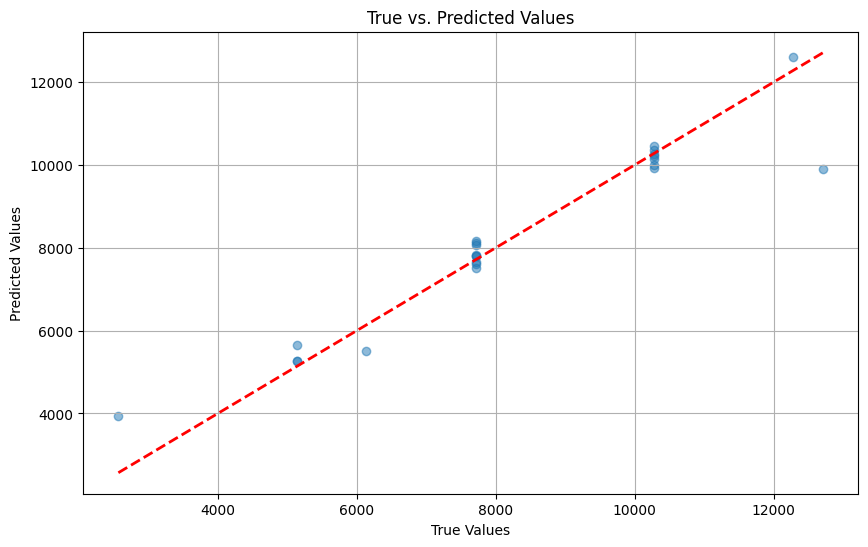

In [252]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=2, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.grid(True)
plt.show()


In [253]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create and train the SVM model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Radial Basis Function (RBF) kernel
svr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculate performance metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print performance metrics
print(f"SVM - MAE: {mae_svr:.2f}")
print(f"SVM - MSE: {mse_svr:.2f}")
print(f"SVM - RMSE: {rmse_svr:.2f}")
print(f"SVM - R² Score: {r2_svr:.2f}")

# Hyperparameter optimization using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Retrain the model using the best parameters
best_svr_model = grid_search.best_estimator_
y_pred_best_svr = best_svr_model.predict(X_test_scaled)

# Recalculate performance metrics for the optimized model
mae_best_svr = mean_absolute_error(y_test, y_pred_best_svr)
mse_best_svr = mean_squared_error(y_test, y_pred_best_svr)
rmse_best_svr = np.sqrt(mse_best_svr)
r2_best_svr = r2_score(y_test, y_pred_best_svr)

# Mean Absolute Percentage Error (MAPE)
mape_best_svr = np.mean(np.abs((y_test - y_pred_best_svr) / y_test)) * 100

# Print optimized model's performance metrics
print(f"Optimized SVM - MAE: {mae_best_svr:.2f}")
print(f"Optimized SVM - MSE: {mse_best_svr:.2f}")
print(f"Optimized SVM - RMSE: {rmse_best_svr:.2f}")
print(f"Optimized SVM - R² Score: {r2_best_svr:.2f}")
print(f"Optimized SVM - MAPE Score: {mape_best_svr:.2f}")


SVM - MAE: 1824.57
SVM - MSE: 6117398.97
SVM - RMSE: 2473.34
SVM - R² Score: -0.06
Best Parameters: {'C': 100, 'epsilon': 1, 'kernel': 'linear'}
Optimized SVM - MAE: 425.95
Optimized SVM - MSE: 763650.93
Optimized SVM - RMSE: 873.87
Optimized SVM - R² Score: 0.87
Optimized SVM - MAPE Score: 4.77


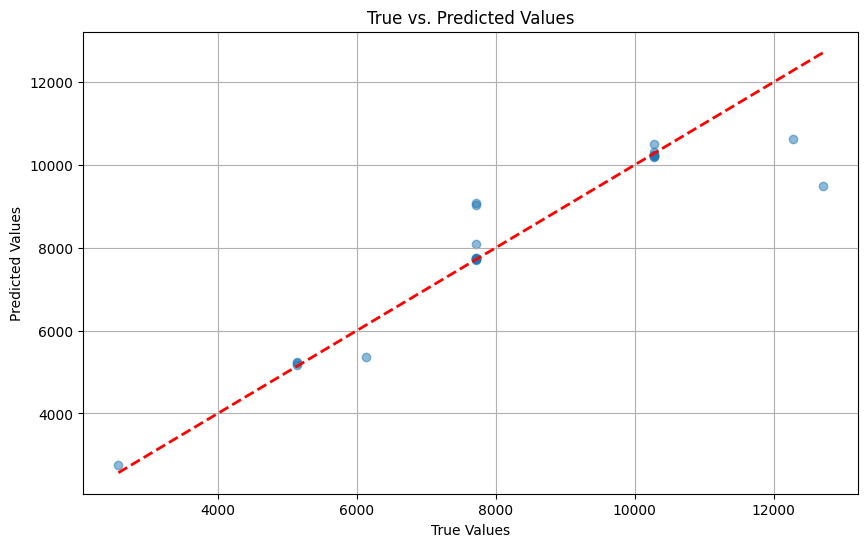

In [254]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_svr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=2, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.grid(True)
plt.show()


In [255]:
# Comparing 4 different Models: XGBoost, Random Forest, CatBoost and SVM
metrics = {
    'Model': ['XGBoost', 'Random Forest', 'CatBoost', 'SVM'],
    'MAE': [mae_xgb, mae_rf, mae_cb, mae_best_svr],
    'MSE': [mse_xgb, mse_rf, mse_cb, mse_best_svr],
    'RMSE': [rmse_xgb, rmse_rf, rmse_cb, rmse_best_svr],
    'R² Score': [r2_xgb, r2_rf, r2_cb, r2_best_svr],
    'MAPE': [mape_xgb, mape_rf, mape_cb, mape_best_svr]
}

comparison_df = pd.DataFrame(metrics)

# Print the table
print(comparison_df)

           Model         MAE           MSE         RMSE  R² Score      MAPE
0        XGBoost  161.704293  2.190616e+05   468.040155  0.962206  1.651110
1  Random Forest  526.552174  1.493213e+06  1221.971119  0.742378  8.409479
2       CatBoost  387.301571  4.987927e+05   706.252547  0.913944  6.025112
3            SVM  425.954244  7.636509e+05   873.871234  0.868249  4.772485


**Observations**:
- XGBoost achieved the best performance among all models, with the highest R² score of 0.96 and the lowest MAE of 161.7. It also had the lowest MAPE of 1.65%, indicating the most accurate predictions in terms of relative error.

- Random Forest showed significantly poorer performance, with the highest MAE of 526.55, an R² score of 0.74, and a very high MAPE of 8.41%, reflecting a less accurate model overall.

- CatBoost provided a good balance, with an R² score of 0.91 and an MAE of 387.3, but still lagging behind XGBoost.

- SVM performed decently with an R² score of 0.87, but its MAE of 425.95 and MAPE of 4.77% were higher compared to XGBoost, making it less favorable.

**Model Development Insights**:
- PCA and Polynomial Features did not improve model performance and did not contribute effectively to the dataset's predictive capabilities. This suggests that the dataset's underlying structure may not benefit from dimensionality reduction or non-linear feature transformations.

- MLP (Multilayer Perceptron), ELM (Extreme Learning Machine), and GPR (Gaussian Process Regression) also failed to deliver satisfactory results, reinforcing that these models are not well-suited for this particular dataset in its current form.

**Conclusion**:

XGBoost stands out as the most effective model for this dataset, achieving the best performance across multiple metrics. Other models, including Random Forest, CatBoost, SVM, and more complex techniques like MLP, ELM, and GPR, did not perform as well. This suggests that for this dataset, tree-based models like XGBoost and CatBoost are the most suitable choices for accurate predictions.

### Business Recommendation

**Fuel at Departure Should Not Exceed 24,000 Liters**:
It is important to ensure that the fuel at departure does not exceed 24,000 liters for any flight. Cases (destination number 3, 8, 9, 7 and index number 49, 50, 29, 55) where the fuel amount exceeds this threshold often lead to inefficiencies in fuel consumption. This can result in unnecessary additional fuel usage, which impacts operational costs and environmental sustainability. Further investigation into these specific cases is necessary to understand why excessive fuel is being loaded, and to identify ways to optimize fuel usage for more efficient flights.

Special Cases that Illustrates the Inefficiency of Excessive Amount of "Fuel at Departure": Special destionations are AYT-SOF, AYT-DUS, AYT-SAW, AYT-MUC and the flight numbers are, resepectively, 2871, 125, 641 and 3272.

**Investigate the First 5 Days of the Month and Saturdays for Passenger Impact on Fuel Consumption**:
The first five days of each month, along with Saturdays, tend to have the highest number of flights. It would be valuable to closely examine these periods to determine whether there is any correlation between the number of passengers and fuel consumption. Understanding if passenger volume significantly affects fuel usage on these busy days can provide insights into potential optimization strategies for both scheduling and fuel management. Analyzing the relationship between these factors will help identify opportunities for reducing fuel consumption while maintaining service levels.

**Larger Dataset for Consistency**:
A larger dataset should be used for further investigations and insights as the current volume of the dataset is not enough to implement train and test algorithms. Further, the dataset is not able to provide in depth information acroos different destinations, weather conditions, flight durations, and the amount of passenger. 